# Main file for running our model

In [1]:
###Libraries (not in function files)

In [1]:
###Own functions
from project_dataload import *
from project_gaussian import *
from Fingerprints import *
from PCA_decomposition import *

In [2]:
###Data load and check

data_dir="./project_data/"
train, test = data_load(data_dir)

print('Check train data')
check_data(train)
print('Check test data')
check_data(test)
summary = summarize_1(train, test)
print('Max number of atoms',summary['max_number_of_atoms'])


Check train data
Train data shape: (8000, 4)
     id        formula                                              atoms  \
0  5154         Zr2BO2  (Atom('Zr', [1.6878604657, 0.892285133, 8.1345...   
1   984          Ni2S6  (Atom('Ni', [1.1571403137, 0.934725185, 12.234...   
2  1634  Cd4K2Cl6O6Te2  (Atom('Cd', [2.7840261751, 5.6922402759, 26.71...   
3  1872      Hf4H2N3O2  (Atom('Hf', [0.0, 1.8677827772, 12.2421466347]...   
4  2977         Sc2Te2  (Atom('Te', [0.0003850118, 0.0002469812, 7.461...   

      hform  
0 -2.037877  
1 -0.091020  
2 -1.109751  
3 -1.609142  
4 -0.854593  
Check test data
Train data shape: (4000, 3)
      id     formula                                              atoms
0   8538    HfZrSTe2  (Atom('S', [-1.0327079693, 4.2080182974, 22.81...
1   9052    Nb2P2Te6  (Atom('Nb', [0.3517632032, -0.2042419274, 9.20...
2  10503  Au2InI2Se2  (Atom('Se', [0.2238411856, 0.8131388722, 26.83...
3    611   AuTlO6Sb2  (Atom('Au', [0.0002076097, -0.0001198635, 16.6...
4   

In [7]:
### Implement fingerprint
max_num_atoms = summary['max_number_of_atoms']
cmats = Coulombmatrices(train, max_num_atoms)
y_vals = train['hform']
print('Shape of cmats', cmats.shape)

0
1000
2000
3000
4000
5000
6000
7000
Shape of cmats (8000, 400)


Shape of split data:  (6400, 400) (1600, 400) (6400,) (1600,)


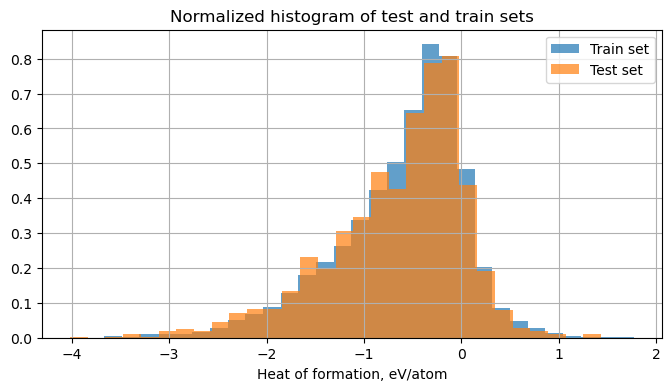

In [16]:
### Split data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(cmats,y_vals,test_size=0.2,random_state=251)

print('Shape of split data: ',X_train.shape, X_test.shape, y_train.shape, y_test.shape)

plt.figure(figsize = (8, 4))
plt.hist(y_train, bins=30, alpha=0.7, density=True, label='Train set')
plt.hist(y_test, bins=30, alpha=0.7, density=True, label='Test set')

plt.grid()
plt.title("Normalized histogram of test and train sets")
plt.xlabel("Heat of formation, eV/atom")
plt.legend()
plt.show()


In [15]:
### PCA

# Number of PC
n_PC = 130
# Standardize the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA to the training set
pca = PCA(n_components=n_PC)
X_train_pca = pca.fit_transform(X_train_scaled)

print('Shape of X_train_pca', X_train_pca.shape)

Shape of X_train_pca (6400, 130)
